# Theoretical Model of Axonal Pathfinding

In [1]:
# set the working directory
wd = '/Users/calebreagor/Documents/hudspeth-lab'

In [2]:
# core dependencies
import sys, pickle
import h5py, rpy2
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sys.path.insert(0, wd)

In [3]:
# custom class for Monte Carlo simulations
from classes.montecarlo import branching_model

In [4]:
# adjust the plotting and display settings
%matplotlib inline
mpl.rcParams['figure.dpi']= 1000

from IPython.display import Markdown
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 5)

## Metropolis MC Random Walk

In [5]:
model = branching_model(f'{wd}/Composite_3.tif', xy_res = 65., z_res = 200.) 

Loaded stack from path.
xy resolution: 65.0 nm
z resolution: 200.0 nm


In [6]:
model.segment_stack(diameter=60)

Running Cellpose with diameter = 60 pixels...

>>>> using CPU
Running test snippet to check if MKL-DNN working
see https://pytorch.org/docs/stable/backends.html?highlight=mkl
** MKL version working - CPU version is sped up. **
processing 1 image(s)
time spent: running network 5.68s; flow+mask computation 0.16
estimated masks for 1 image(s) in 5.87 sec
>>>> TOTAL TIME 5.87 sec


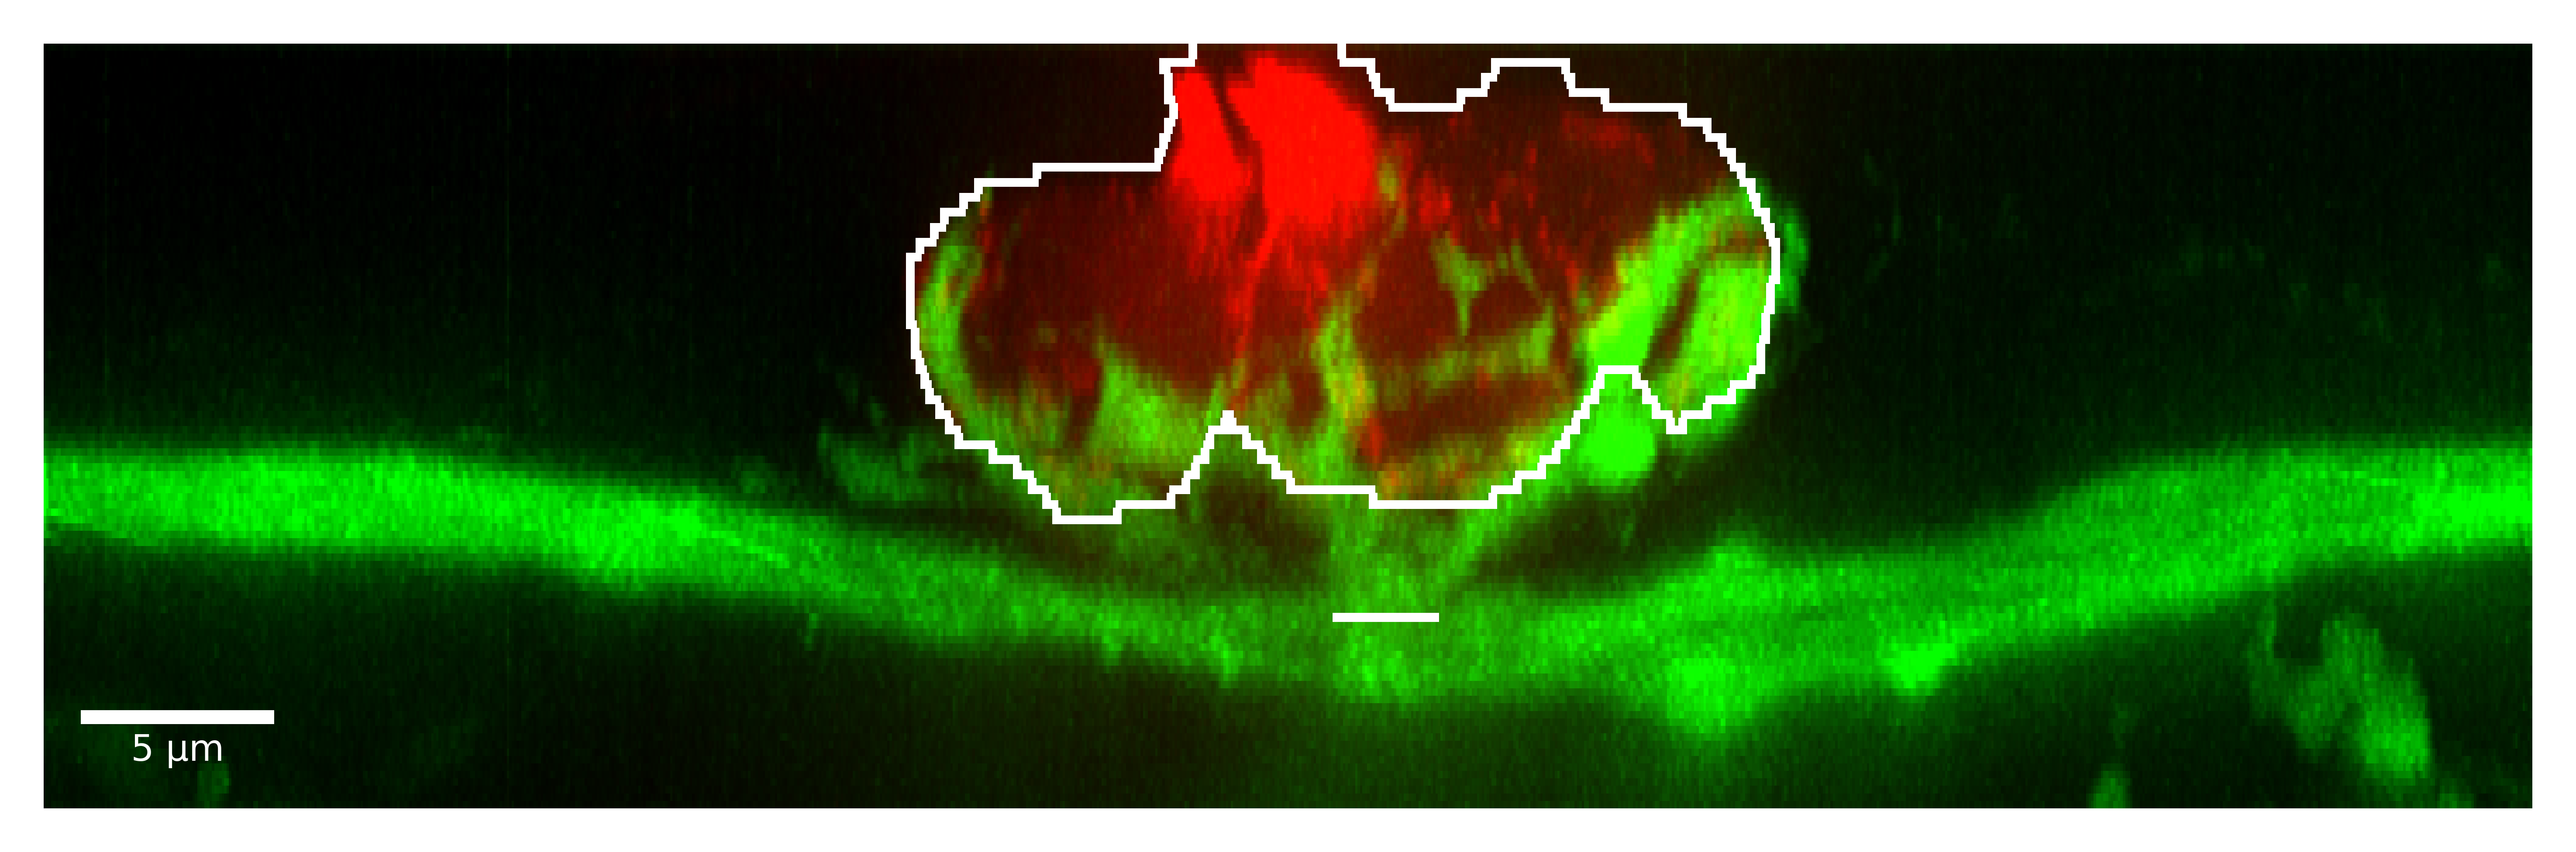

In [9]:
model.show_segmentation(separate_channels=False, annotate=[[530,570],[25]])

In [10]:
model.simulate_metropolisMC(start=[[530,570],[25]], nsteps=1000, nseeds=2, d=0.5, σ=2.0, U=10, s=1.0, U2=50)

minimum potential: -10 (AU)
signal length scale: 2.0 μm
maximum step size: 0.5 μm


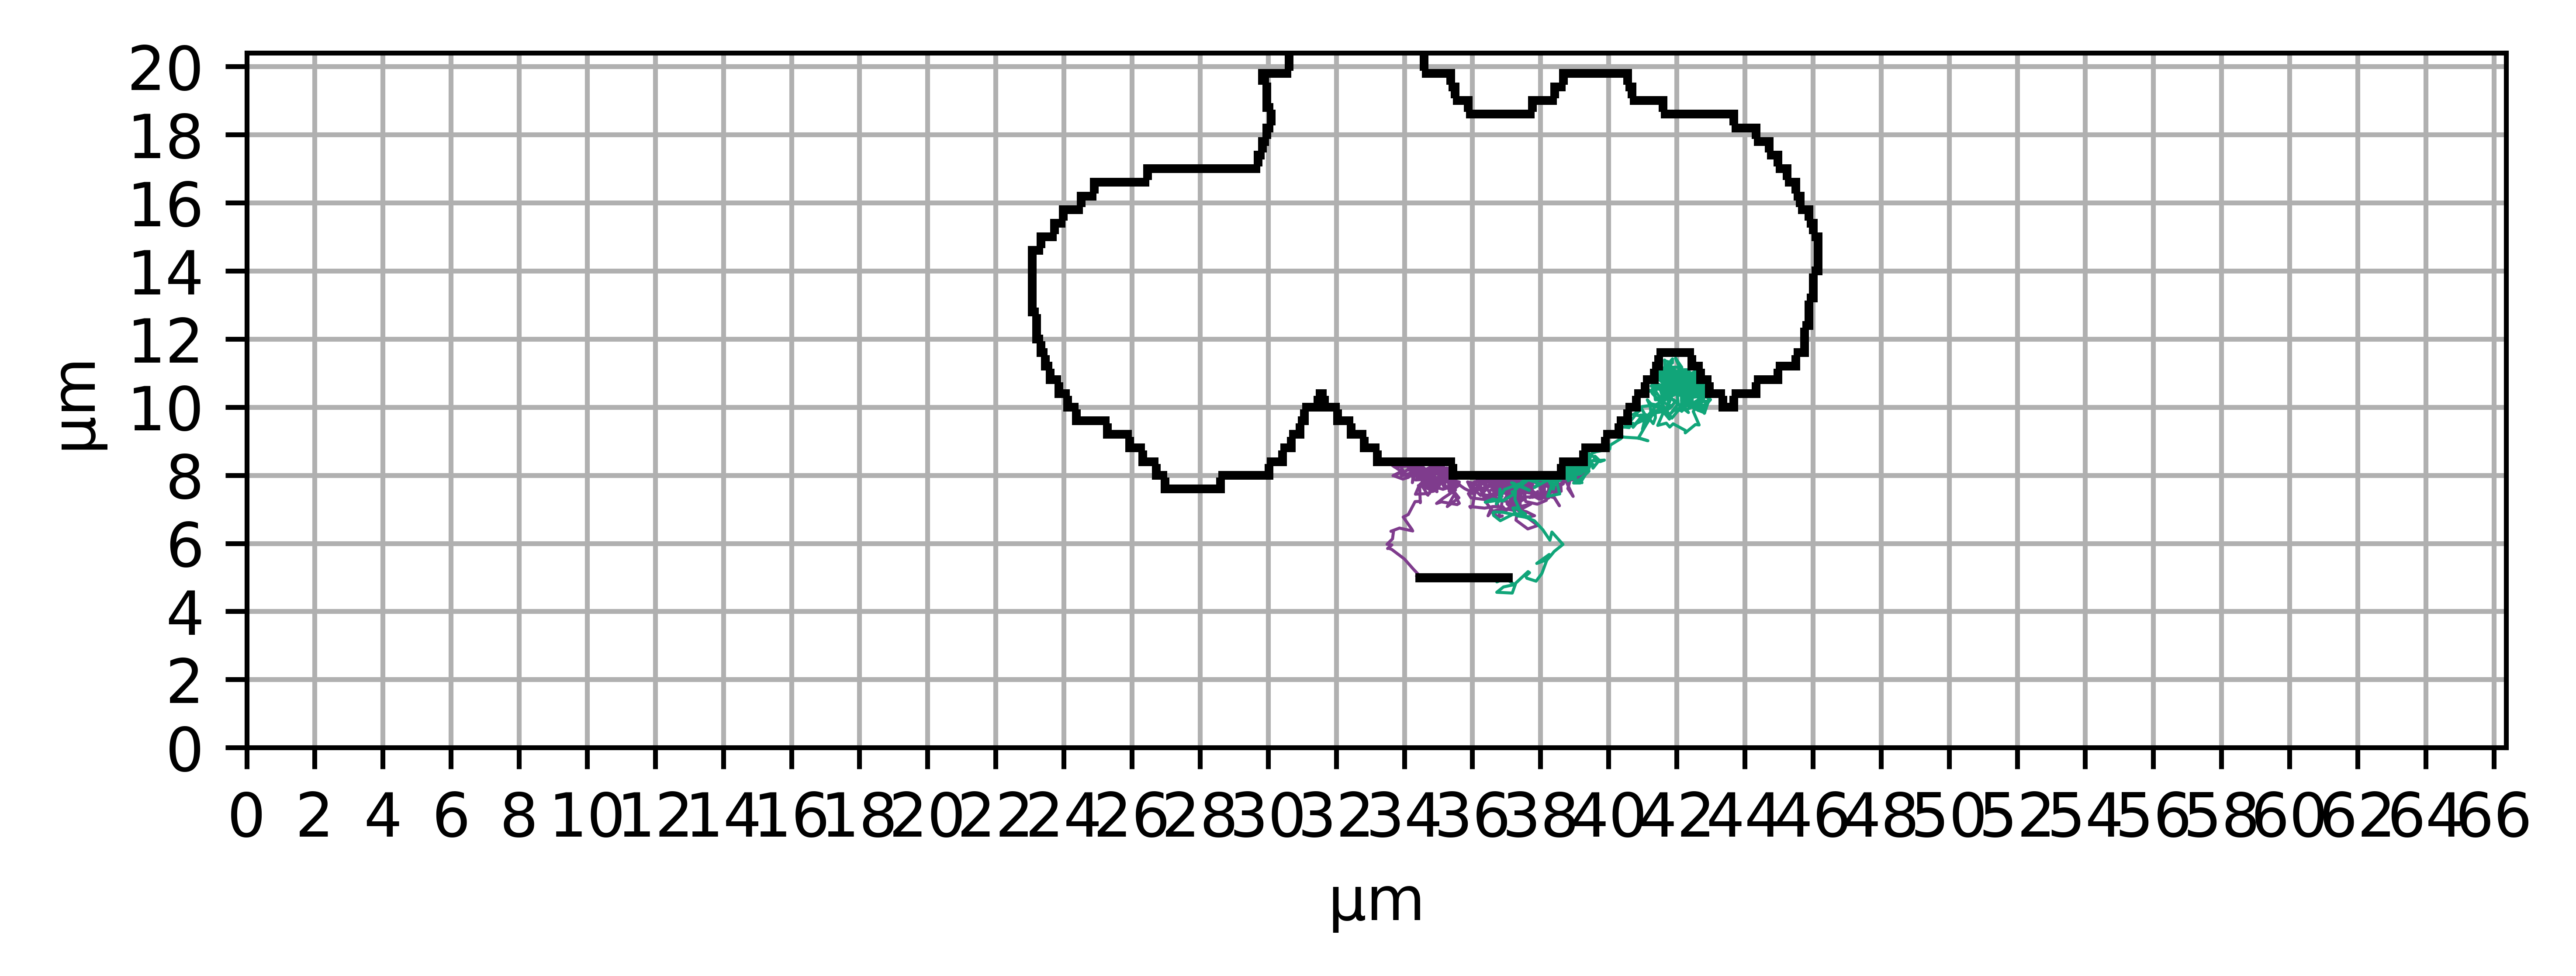

In [11]:
model.plot_trajectories(xtickinterval=2, ytickinterval=2)

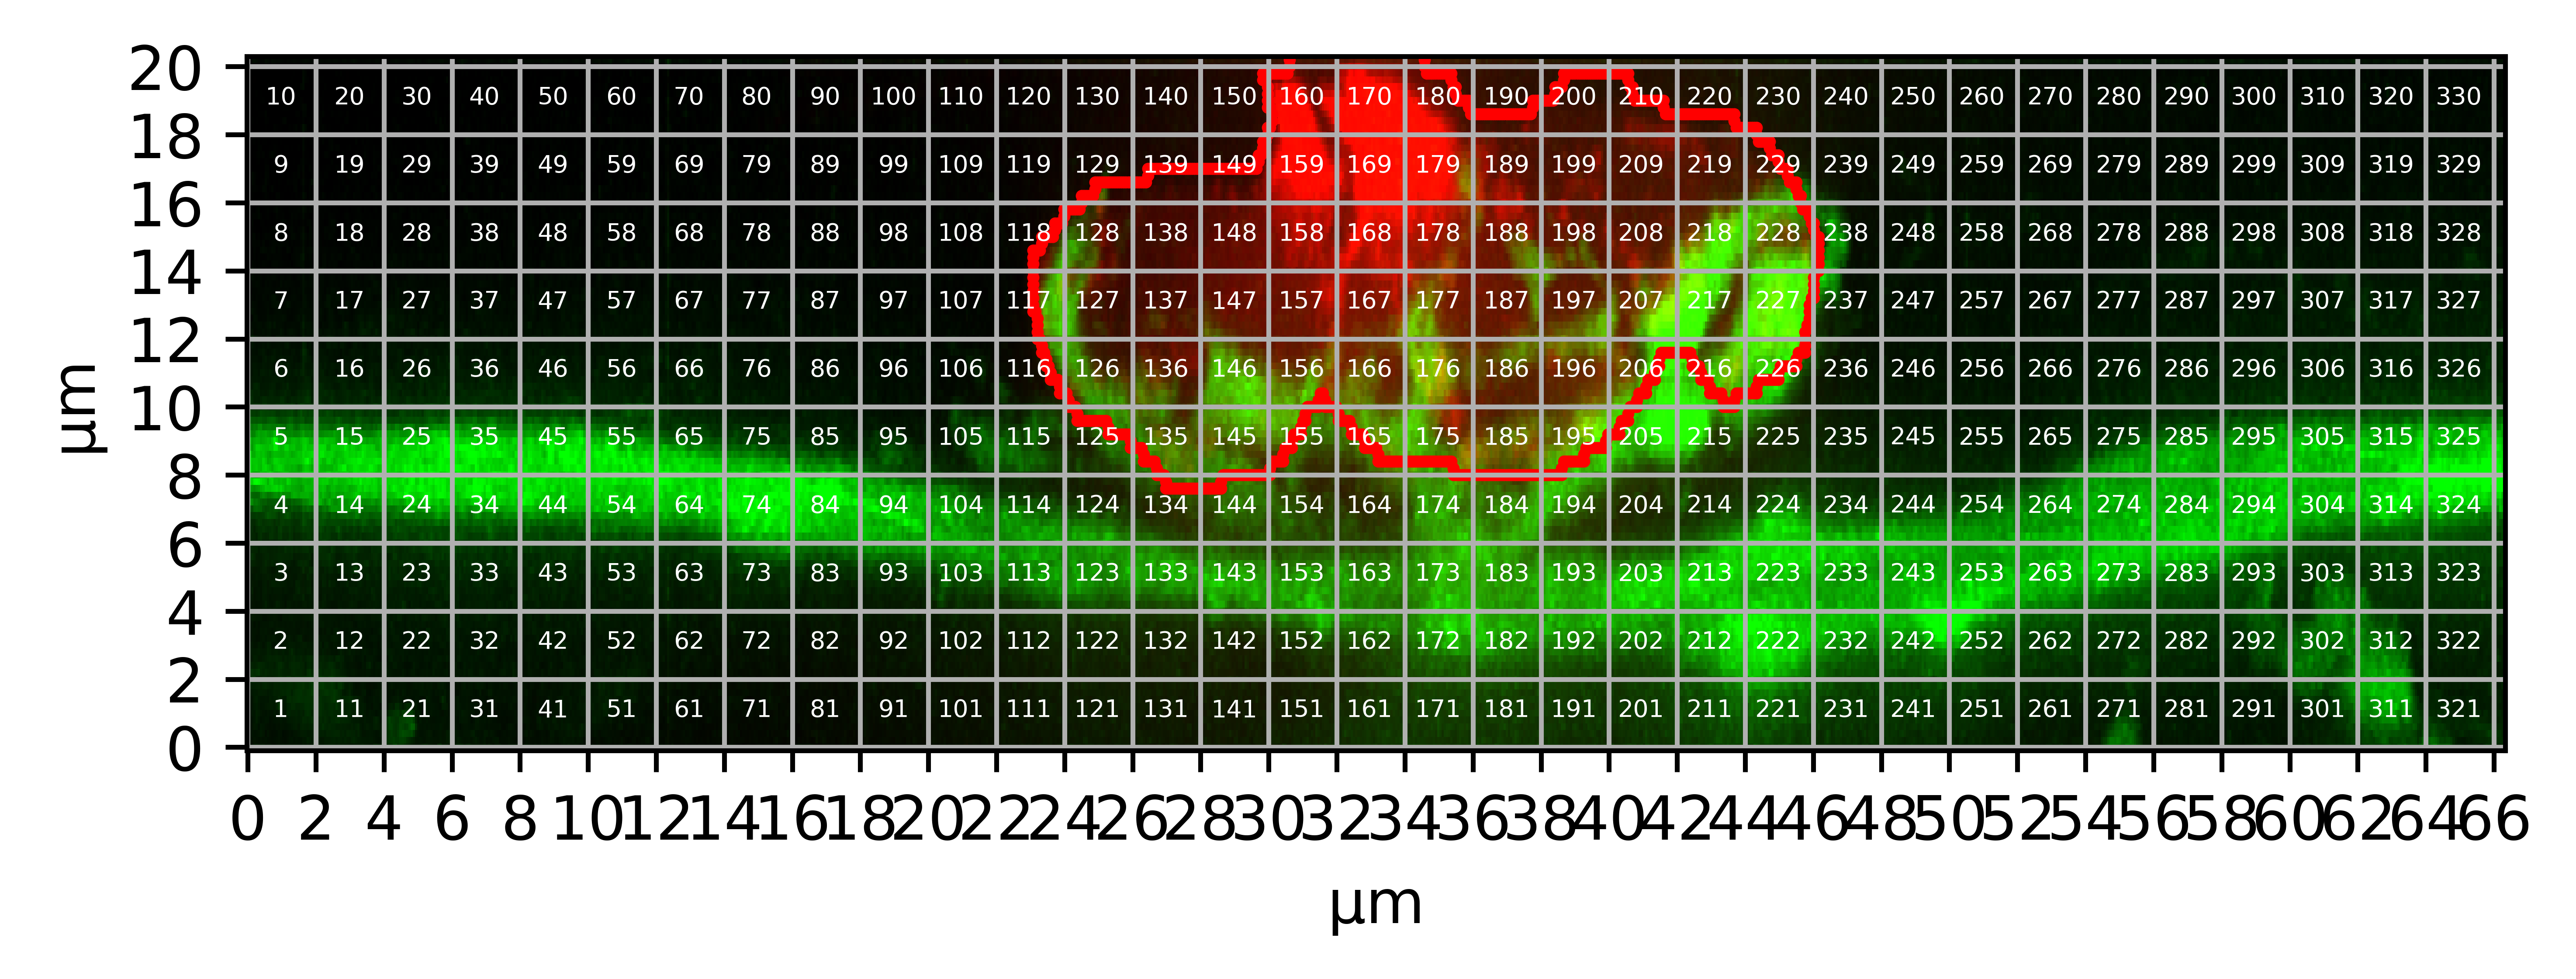

In [12]:
# from skimage.draw import ellipse_perimeter, ellipse
# xx, yy = ellipse_perimeter(520, 65, 250, 35)
# xx_, yy_ = ellipse(520, 65, 250, 35)
# ellipse_mask = np.zeros(model.xz_maxNorm[...,1].shape)
# ellipse_mask[yy_, xx_] = 1.

# fig, ax = plt.subplots(1,2, sharex=True, sharey=True)

xtickinterval, ytickinterval = 2, 2

axons = model.xz_maxNorm[...,1].copy()
# trajs = model.pos_mask.copy()

threshold, bw = 0.2, False

if bw==True:
    axons[np.where((axons<threshold))] = 0.
    axons[axons>0.] = 1.
    

plt.imshow(model.xz_maxNorm, aspect=model.aspect, origin='lower', cmap='gray')
plt.scatter(model.membrane[:,0], model.membrane[:,1]/model.aspect, c='r', s=1)
# plt.scatter(xx, yy, c='r', s=0.1)

ax = plt.gca()

y_upper, x_upper, _ = model.xz_maxNorm.shape

xticklabels = np.arange(0, x_upper / 1e3 * model.xy_res, xtickinterval)
yticklabels = np.arange(0, y_upper / 1e3 * model.z_res, ytickinterval)
xticklocs = xticklabels * 1e3 / model.xy_res
yticklocs = yticklabels * 1e3 / model.z_res

ax.set_xticks(xticklocs)
ax.set_yticks(yticklocs)
ax.set_xticklabels(xticklabels.astype(np.int64))
ax.set_yticklabels(yticklabels.astype(np.int64))

ax.set_xlabel('μm')
ax.set_ylabel('μm')
ax.grid(True)


regions = np.zeros(model.pos_mask.shape)
yy, xx = np.indices(regions.shape)

n = 1
for i in range(xticklocs.size-1):
    for j in range(yticklocs.size-1):
        x0, x1 = np.round(xticklocs[i:i+2]).astype(np.int64)
        y0, y1 = np.round(yticklocs[j:j+2]).astype(np.int64)
        regions[np.where((xx>=x0)&(xx<x1)&(yy>=y0)&(yy<y1))] = n
        n += 1

for i in np.unique(regions)[1:]:
    y, x = np.where(regions==i)
    plt.text(x=x.mean(), y=y.mean(), s=str(int(i)), size=4, color='w', ha='center')

# plt.show()
plt.tight_layout()

In [ ]:
from scipy.stats import entropy



entropy(pk, qk)